# Image Compression Using PCA

---

In this project we are going to read in the Olivetti faces dataset, a set of photographs of faces. 

- First we are going to process and depict the images.
- Then we are going to use principal component analysis on the images to extract the most important parts.
- We will compare the images with reduced amount of information with the original ones.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

 
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

np.set_printoptions(precision=4)

## Faces Dataset
---

Let's load in the Olivetti faces dataset from sklearn.

In [53]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()
print(dataset.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



### Load the Dataset


- There are 400 images of faces. (i.e. rows of data)
- Each image is 64x64 pixels, i.e. a total of 4096 pixels (i.e. features)

In [54]:
dataset = fetch_olivetti_faces()
faces = dataset.data
faces.shape

(400, 4096)

#### Let's look at a single observation

In [55]:
face10 = faces[10]
print((face10.shape))

# This is a grayscale image, so each pixel is from 0 (black) to 1 (white)
print(face10)

(4096,)
[0.5413 0.5868 0.6405 ... 0.095  0.1116 0.1116]


#### Set up a couple of functions, one to process an image (reshape it to a 2D matrix) and the other to actually plot the image matrix.

In [56]:
def plot_image_matrix(face_image):
    """ 
    Plots a grayscale 2-D ndarray `face_image`. 
        Pixel values can have any scale.
    """
    fig, ax = plt.subplots(figsize=(5,5))
    
    # max value (in magnitude)
    max_pixel_value = max(face_image.max(), -face_image.min())
    
    ax.imshow(face_image, cmap=plt.cm.gray,
              interpolation='nearest', 
              vmin=-max_pixel_value,
              vmax=max_pixel_value)
    
    ax.set_xticks(())
    ax.set_yticks(())

def process_image(image):
    """ 
    Standardize a 1-D 4096-element ndarray `image` to end up with:
      - A new 2-D 64x64-element ndarray, with
      - Pixel values between (-0.5, 0.5).
    """

    # Min-Max scaling to end up with values between (-0.5, 0.5)
    image = image.reshape(-1,1)
    scaler = MinMaxScaler(feature_range=(-0.5,0.5))
    image = scaler.fit_transform(image)

    
    # Convert the 4096-element `image` to 64x64
    image.shape = (64,64)
    return image

In [57]:
face10 = process_image(faces[10])
print((face10.shape))
print(face10)

(64, 64)
[[ 0.0291  0.0825  0.1456 ...  0.034   0.0437  0.0485]
 [ 0.0437  0.1165  0.165  ...  0.068   0.0777  0.0728]
 [ 0.0728  0.1602  0.1893 ...  0.0631  0.1019  0.0971]
 ...
 [-0.4563 -0.4466 -0.4466 ... -0.5    -0.4709 -0.4806]
 [-0.4515 -0.4466 -0.4515 ... -0.4951 -0.4757 -0.4806]
 [-0.4466 -0.4515 -0.4466 ... -0.4951 -0.4757 -0.4757]]


Given the image below and the image matrix above:
- The top rows are light colored.
    - So, the first few rows of numbers are > 0.0
- The final rows start dark and end dark. 
    - So, the last few rows of numbers start and end < 0.0

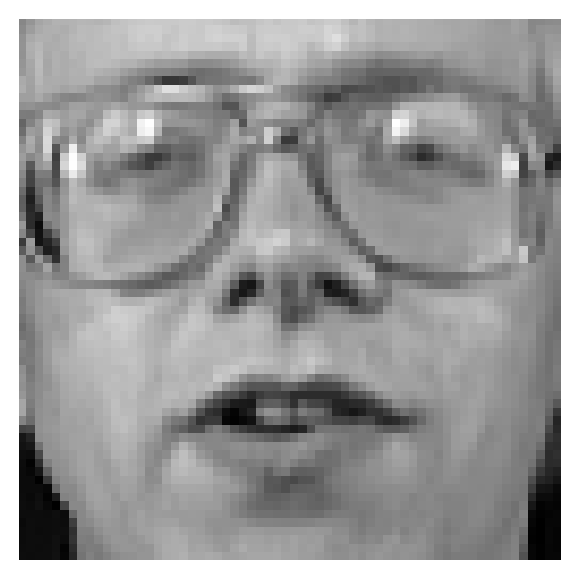

In [58]:
plot_image_matrix(process_image(face10))

#### Another picture

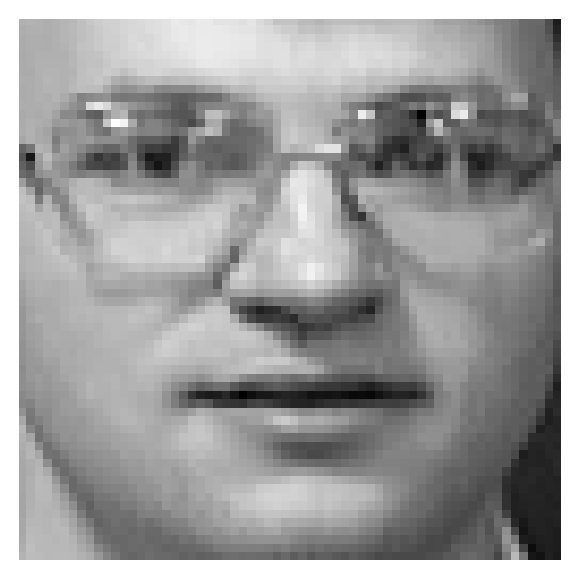

In [59]:
plot_image_matrix(process_image(faces[50]))

## PCA on the image

#### Take picture number 10 reshaped to 64 times 64 pixels

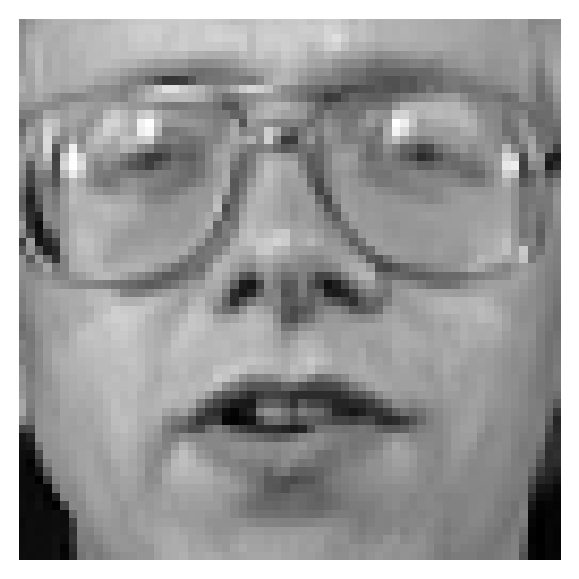

In [60]:
current_image = process_image(faces[10])
plot_image_matrix(current_image)

#### Transform to principal components

Limit number of components.

- Instantiate PCA
- Fit and transform the image
- Extract the explained variance and the explained variance ratio

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=current_image.shape[1])
pca.fit(current_image)
image_transformed = pca.fit_transform(current_image)

print("Number of principal components:\t", pca.n_components_)
print("Explained variance:\n", np.round(pca.explained_variance_,3))
print("Explained variance ratio:\n", np.round(pca.explained_variance_ratio_,3))

print("Transformed features:")
print(pca.fit_transform(current_image))

Number of principal components:	 64
Explained variance:
 [0.411 0.323 0.151 0.071 0.051 0.043 0.033 0.028 0.025 0.022 0.016 0.012
 0.01  0.008 0.006 0.005 0.005 0.004 0.003 0.003 0.003 0.002 0.002 0.002
 0.001 0.001 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]
Explained variance ratio:
 [0.33  0.259 0.121 0.057 0.041 0.035 0.027 0.022 0.02  0.018 0.013 0.009
 0.008 0.006 0.005 0.004 0.004 0.003 0.003 0.002 0.002 0.002 0.001 0.001
 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]
Transformed features:
[[ 1.2273e+00  4.4973e-01 -1.2297e-01 ... -3.6280e-04 -1.5484e-04
   1.5093e-07]
 [ 1.3355e+00  4.8018e-01 -1.0498e-01 ...  2.7357

#### Produce a scree plot

Explained variance and the explained variance ratio versus the number of principal components.

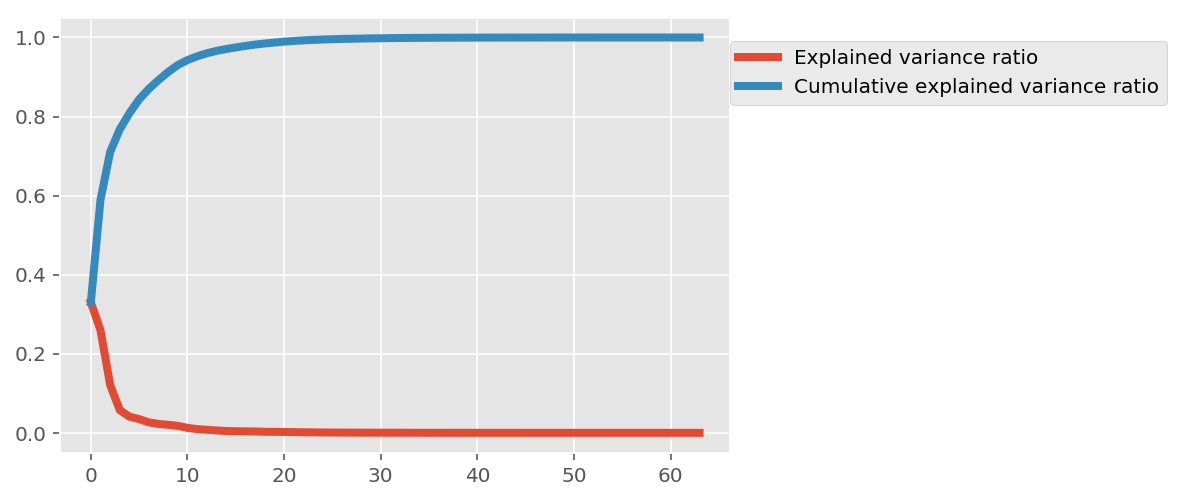

In [62]:
plt.plot(pca.explained_variance_ratio_,lw=4,label='Explained variance ratio')
plt.plot(np.cumsum(pca.explained_variance_ratio_),lw=4,label='Cumulative explained variance ratio')
plt.legend(loc=(1,0.8))
plt.show()

#### Plot the transformed image in the (reduced) principal component coordinates 

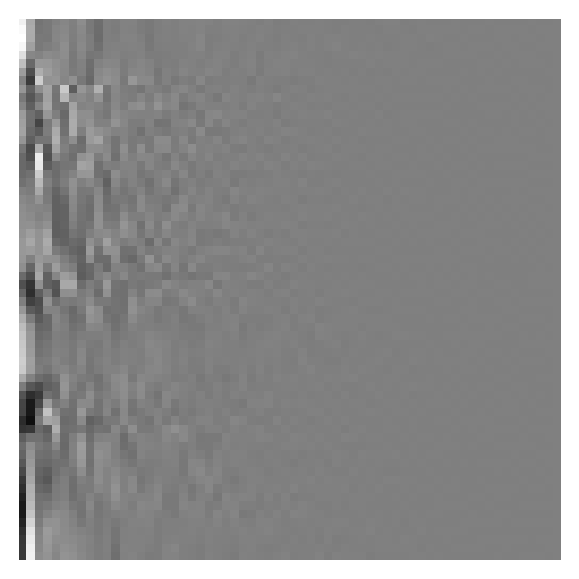

In [63]:
plot_image_matrix(image_transformed)

#### Plot the matrix obtained with `pca.components` as an image

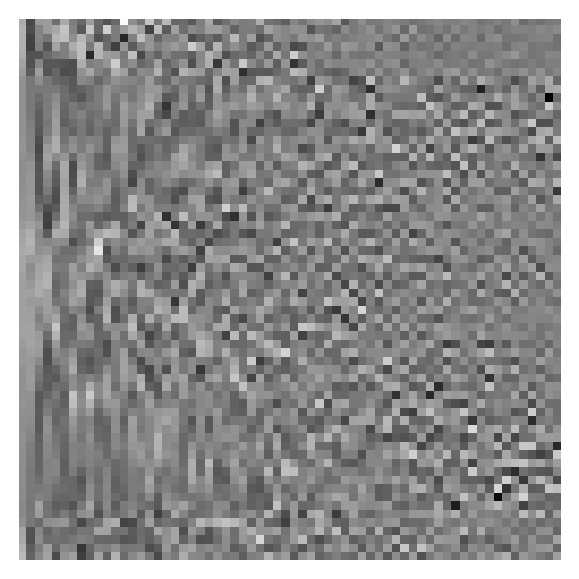

In [64]:
plot_image_matrix(pca.components_.T)

#### Apply the inverse transform to the transformed image. 

In [65]:
pca = PCA(n_components=current_image.shape[1]-54)
pca.fit(current_image)
image_transformed = pca.fit_transform(current_image)

print(pca.inverse_transform(image_transformed))

[[ 0.0256  0.0651  0.1751 ...  0.0427  0.0267  0.0545]
 [ 0.0455  0.1049  0.1997 ...  0.0548  0.0544  0.0778]
 [ 0.0736  0.1443  0.224  ...  0.067   0.0678  0.0908]
 ...
 [-0.4758 -0.4491 -0.4476 ... -0.514  -0.477  -0.4612]
 [-0.4798 -0.461  -0.4598 ... -0.5229 -0.4796 -0.4461]
 [-0.4731 -0.4596 -0.4502 ... -0.525  -0.4886 -0.4441]]


In [66]:
# the original values for comparison
print(current_image)

[[ 0.0291  0.0825  0.1456 ...  0.034   0.0437  0.0485]
 [ 0.0437  0.1165  0.165  ...  0.068   0.0777  0.0728]
 [ 0.0728  0.1602  0.1893 ...  0.0631  0.1019  0.0971]
 ...
 [-0.4563 -0.4466 -0.4466 ... -0.5    -0.4709 -0.4806]
 [-0.4515 -0.4466 -0.4515 ... -0.4951 -0.4757 -0.4806]
 [-0.4466 -0.4515 -0.4466 ... -0.4951 -0.4757 -0.4757]]


#### Plot the image obtained after inverse transform. Compare to the original image.

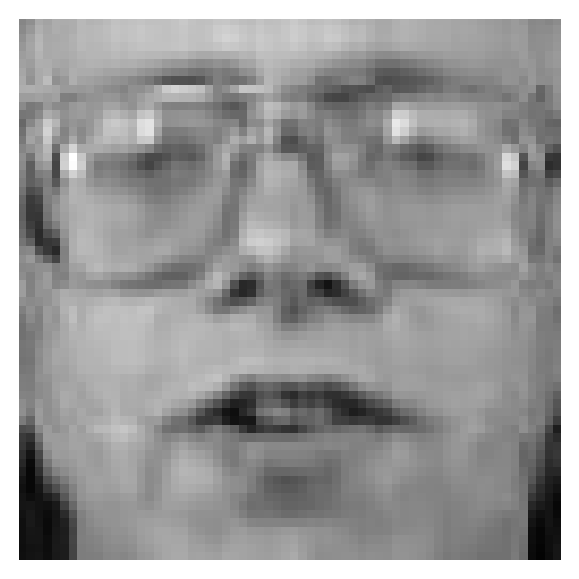

In [67]:
plot_image_matrix(pca.inverse_transform(image_transformed))

### Apply clustering to the dataset with all images. Evaluate the assigned cluster labels against the true labels contained in `dataset.target`.

- The original dataset contains faces of 40 different persons.
- Will consider different available distance metrics, e.g. `cosine`.

In [68]:
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation

In [69]:
agg = AgglomerativeClustering(n_clusters=40,linkage='average',affinity='cosine')
agg.fit(dataset.data)
labels = agg.labels_

print(labels[:10])

[11  4 11  2  4  2 11 13 11  4]


In [70]:
def cluster_score(X, y, labels):
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels))
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

In [71]:
cluster_score(dataset.data,dataset.target,labels)

Silhouette Coefficient: 0.098
Homogeneity: 0.645
Completeness: 0.824
V-measure: 0.724


In [72]:
k_means = KMeans(n_clusters=40)
k_means.fit(dataset.data)
labels_k = k_means.labels_

In [73]:
cluster_score(dataset.data,dataset.target,labels_k)

Silhouette Coefficient: 0.135
Homogeneity: 0.770
Completeness: 0.803
V-measure: 0.786


In [74]:
db = DBSCAN(eps=0.01,min_samples=3,metric='cosine')
db.fit(dataset.data)
labels_db = db.labels_
print(np.unique(db.labels_))

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24]


In [75]:
cluster_score(dataset.data,dataset.target,labels_db)

Silhouette Coefficient: -0.109
Homogeneity: 0.337
Completeness: 0.780
V-measure: 0.471


In [76]:
aff = AffinityPropagation(damping=0.5,max_iter=200)

In [77]:
aff.fit(dataset.data)
labels_aff = aff.labels_
np.unique(labels_aff).shape

(56,)

In [78]:
cluster_score(dataset.data,dataset.target,labels_aff)

Silhouette Coefficient: 0.172
Homogeneity: 0.823
Completeness: 0.786
V-measure: 0.804


### PCA transform the whole dataset and fit a logistic regression model

In [79]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#### Cross validated model on the whole dataset

In [80]:
model = LogisticRegressionCV(cv=5)
model.fit(dataset.data,dataset.target)
model.score(dataset.data,dataset.target)

1.0

In [81]:
model.coef_[0].shape

(4096,)

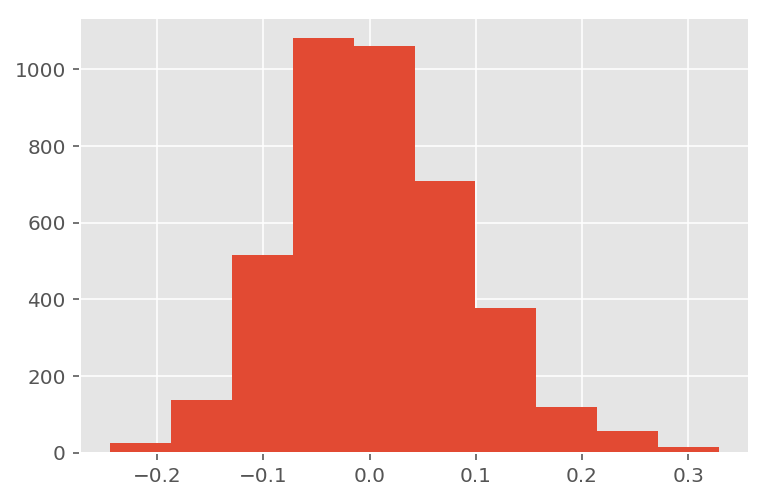

In [82]:
plt.hist(model.coef_[0]);

#### Let's add train-test split and subset on a few features

Here, just as an example, we take the first 200 features, but any choice will do.

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data,dataset.target,
                    stratify=dataset.target,test_size=0.2)

In [85]:
n = 200
model_pca = LogisticRegressionCV(cv=5)
model_pca.fit(X_train[:,:n],y_train)
model_pca.score(X_test[:,:n],y_test)

0.675

#### Cross validated model on the PCA reduced dataset

In [86]:
pca = PCA()
pca.fit(dataset.data)
image_transformed = pca.fit_transform(dataset.data)

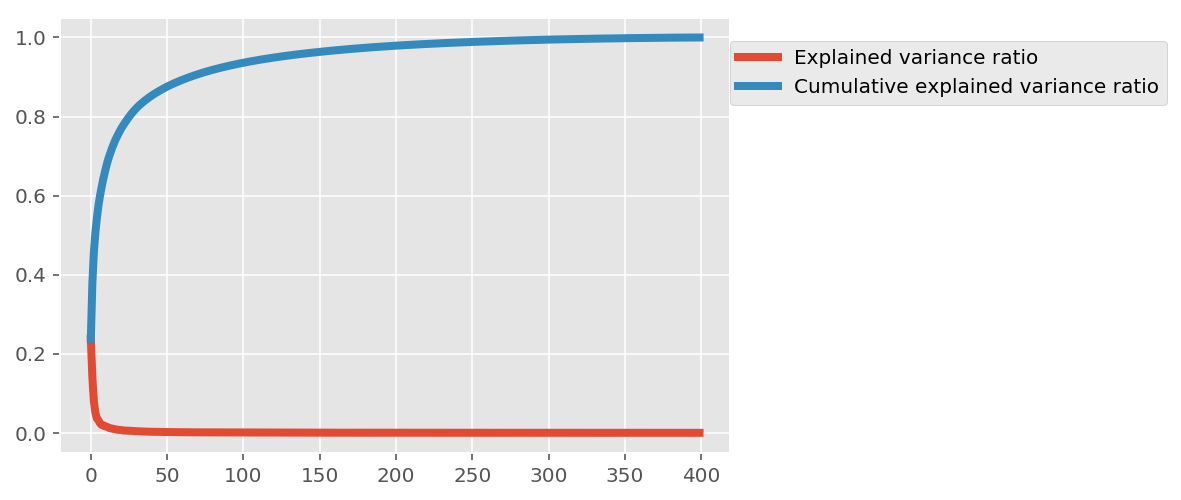

In [87]:
plt.plot(pca.explained_variance_ratio_,lw=4,label='Explained variance ratio')
plt.plot(np.cumsum(pca.explained_variance_ratio_),lw=4,label='Cumulative explained variance ratio')
plt.legend(loc=(1,0.8))
plt.show()

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(image_transformed,dataset.target,
                    stratify=dataset.target,test_size=0.2)

In [90]:
n = 200
model_pcat = LogisticRegressionCV(cv=5,random_state=1)
model_pcat.fit(X_train[:,:n],y_train)
model_pcat.score(X_test[:,:n],y_test)

0.9625

In [91]:
print(metrics.classification_report(y_test,
                    model_pca.predict(X_test[:,:n])))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         2
          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00         2
          5       0.00      0.00      0.00         2
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00         2
          8       0.00      0.00      0.00         2
          9       0.00      0.00      0.00         2
         10       0.00      0.00      0.00         2
         11       0.00      0.00      0.00         2
         12       0.00      0.00      0.00         2
         13       0.00      0.00      0.00         2
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         2
         16       0.00      0.00      0.00         2
         17       0.00      0.00      0.00   

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
